# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [2]:
import pandas as pd

# load the training dataset
data = pd.read_csv('https://raw.githubusercontent.com/Asharib706/ml-basics/master/challenges/data/real_estate.csv')
data.sample(15)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
225,2013.250,1.1,193.58450,6,24.96571,121.54089,49.0
288,2013.583,16.6,323.69120,6,24.97841,121.54280,51.0
335,2013.583,27.3,337.60160,6,24.96431,121.54063,36.5
11,2013.333,6.3,90.45606,9,24.97433,121.54310,58.1
147,2012.750,3.2,489.88210,8,24.97017,121.54494,43.2
245,2013.417,7.5,639.61980,5,24.97258,121.54814,40.8
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
289,2013.333,13.9,289.32480,5,24.98203,121.54348,44.5
321,2012.917,16.9,964.74960,4,24.98872,121.53411,37.7
322,2013.000,12.9,187.48230,1,24.97388,121.52981,33.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

### *Distributions* 

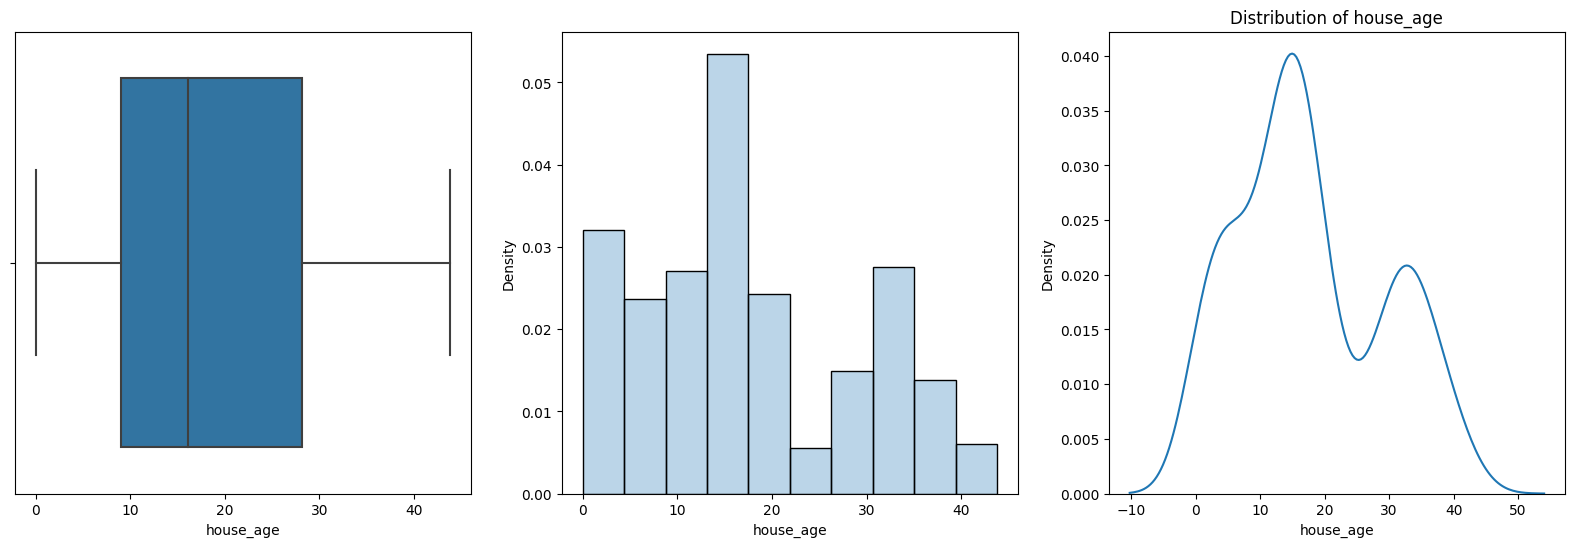

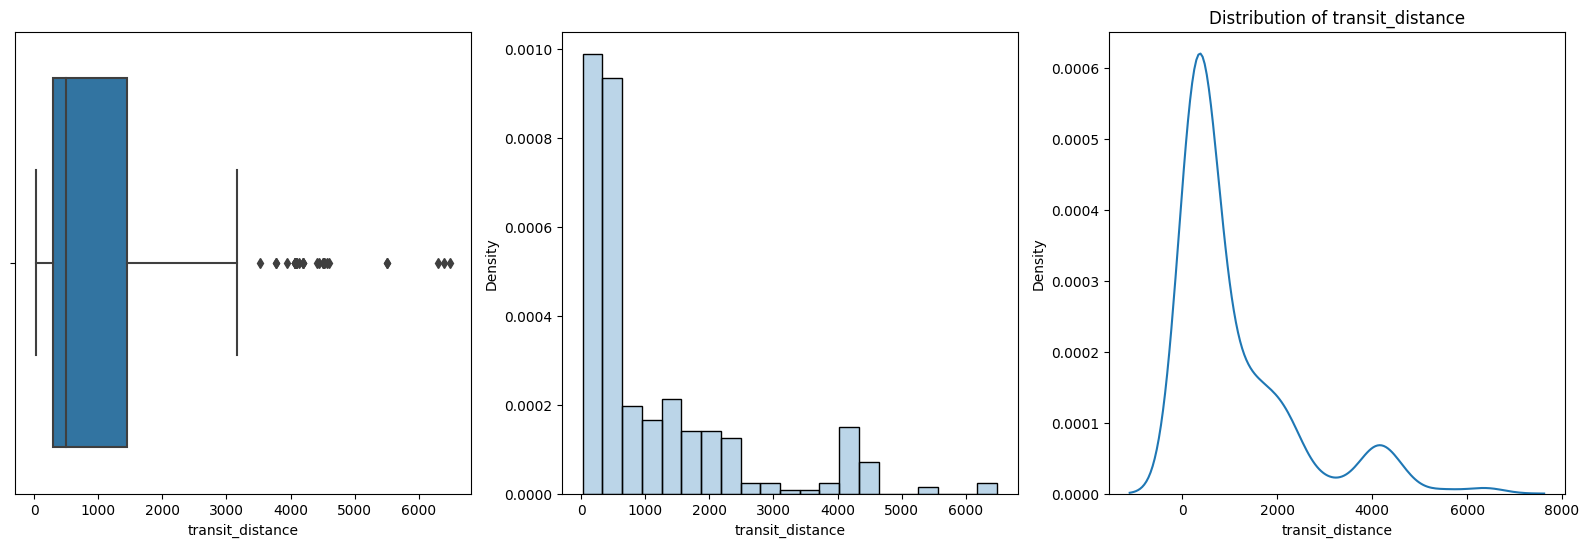

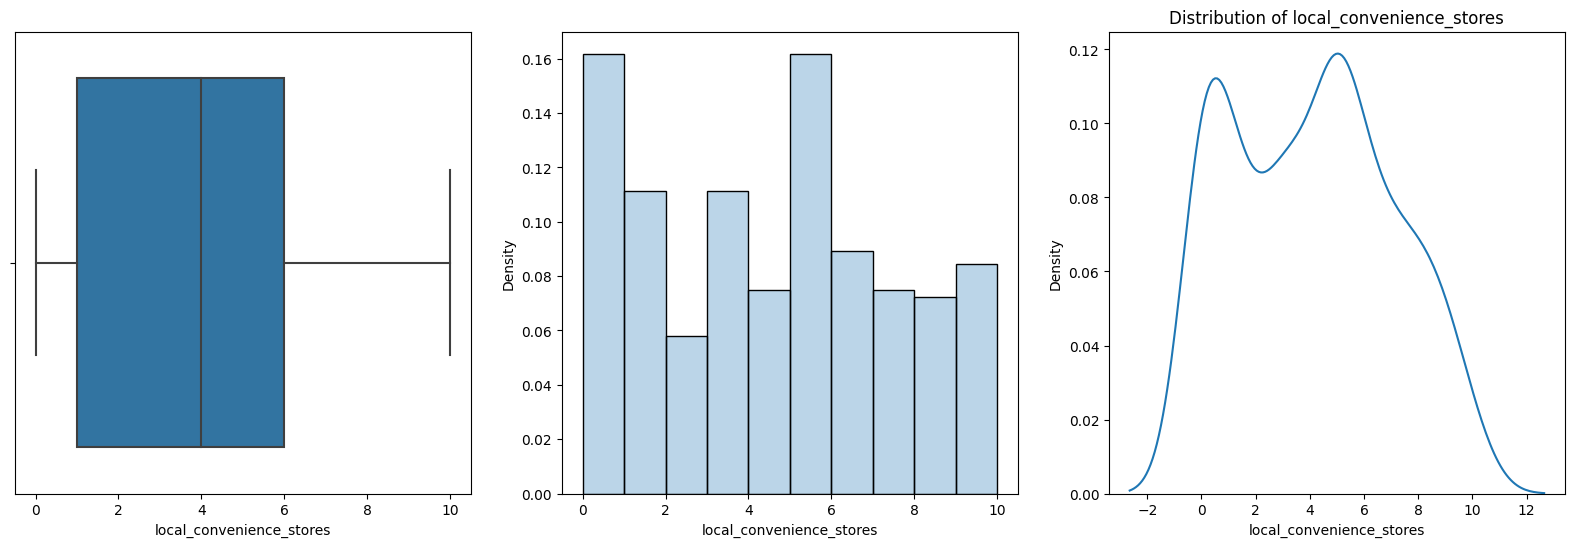

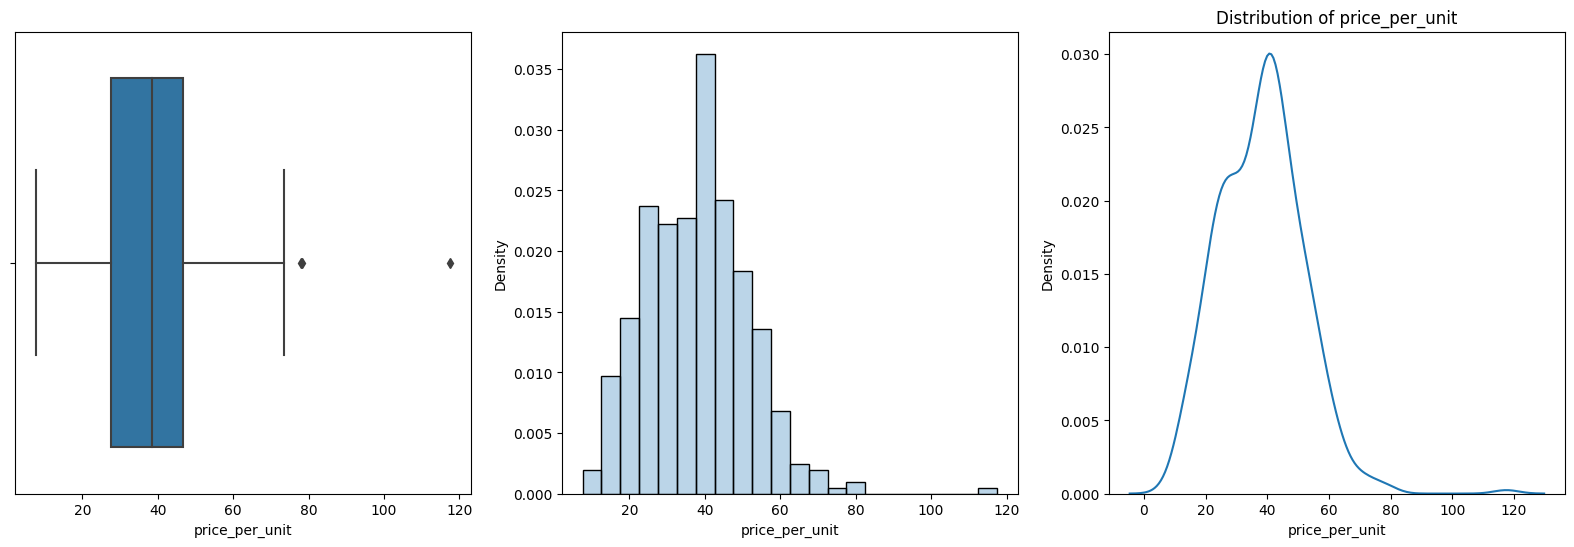

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
dist_col=['house_age','transit_distance','local_convenience_stores','price_per_unit']
for i in dist_col:
  fig,axes=plt.subplots(1,3,figsize=(20,6))
  sns.boxplot(x=data[i],ax=axes[0])
  sns.histplot(data[i],ax=axes[1],kde=False,stat='density',alpha=0.3)
  sns.kdeplot(data[i])
  plt.title(f'Distribution of {i}')
plt.show()

In [4]:
data.shape

(414, 7)

In [5]:
# delete the outliers in price
data['price_per_unit'].sort_values(ascending=False)

270    117.5
220     78.3
312     78.0
166     73.6
105     71.0
       ...  
226     12.8
116     12.2
162     11.6
347     11.2
113      7.6
Name: price_per_unit, Length: 414, dtype: float64

In [6]:
max=data['price_per_unit'].max()
max

117.5

In [7]:
data=data[data['price_per_unit']!=max]
data.shape

(413, 7)

<Axes: >

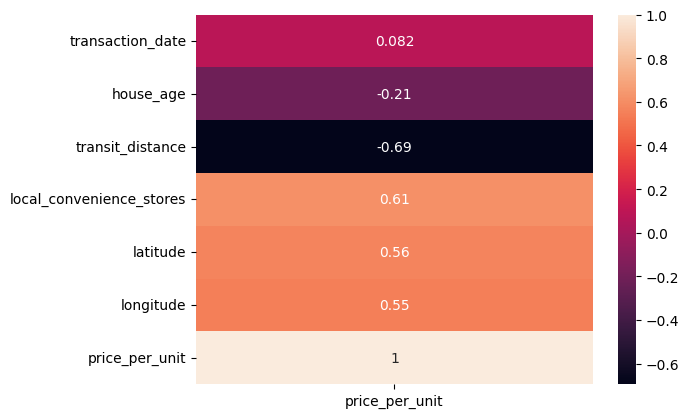

In [8]:
sns.heatmap(data.corr(method='pearson').loc[:,['price_per_unit']],annot=True)

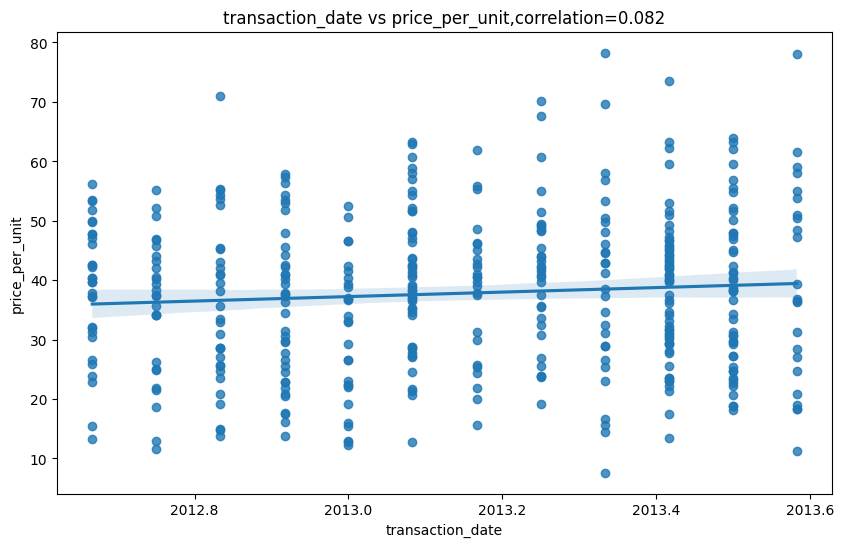

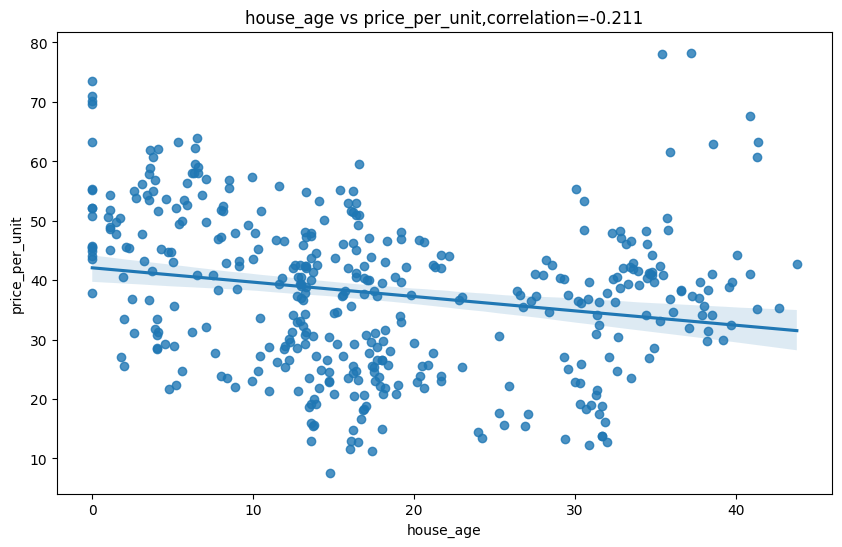

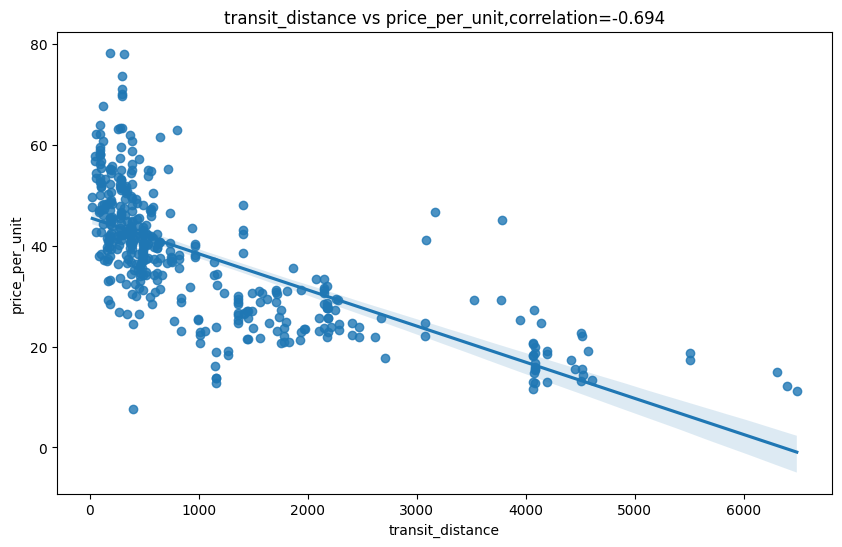

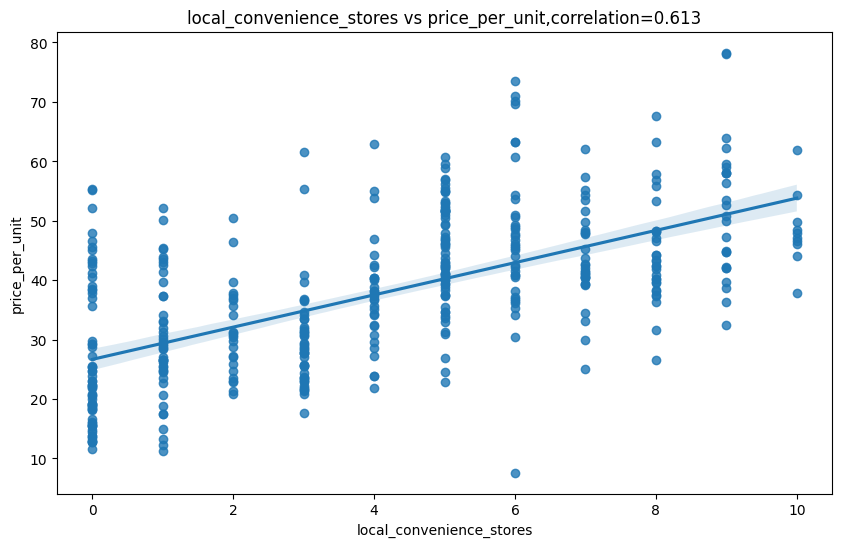

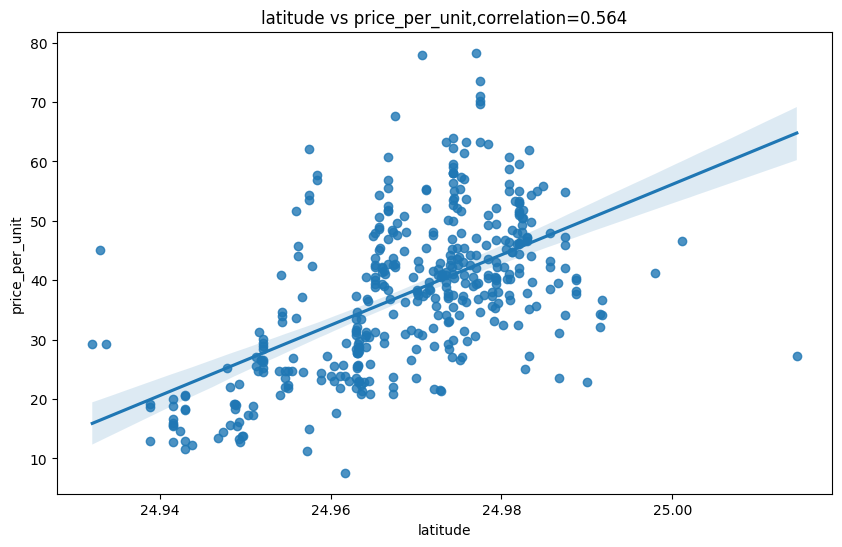

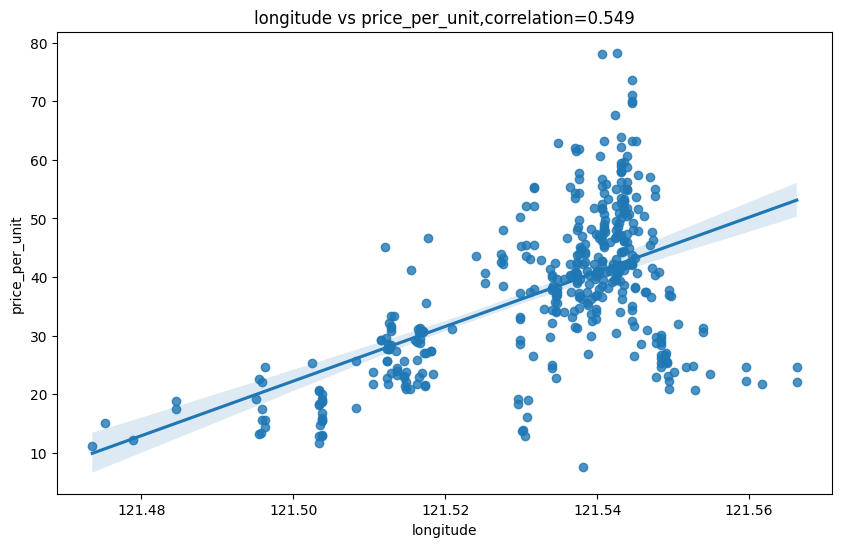

In [9]:
label='price_per_unit'
columns=['transaction_date',	'house_age'	,'transit_distance','local_convenience_stores',	'latitude',	'longitude']
for i in columns:
  fig,axes=plt.subplots(1,1,figsize=(10,6))
  sns.regplot(x=i,y=label,data=data)
  plt.title(f'{i} vs {label},correlation={round(data.price_per_unit.corr(data[i]),3)}')

## Using regression model to predict relationship between price and other attributes

In [10]:
from sklearn.model_selection import train_test_split
# Split the dataset in an 70/30 train/test ratio. We also obtain the respective corresponding indices from the original dataset.
train, test = train_test_split(data, train_size=0.7, random_state=21)

print("Train")
print(train.head())
print(train.shape)

print("Test")
print(test.head())
print(test.shape)

Train
     transaction_date  house_age  transit_distance  local_convenience_stores  \
372          2013.000       33.9         157.60520                         7   
224          2013.333       34.5         324.94190                         6   
19           2012.667        1.5          23.38284                         7   
278          2012.750        0.0         208.39050                         6   
136          2012.750       11.4         390.56840                         5   

     latitude  longitude  price_per_unit  
372  24.96628  121.54196            41.5  
224  24.97814  121.54170            46.0  
19   24.96772  121.54102            47.7  
278  24.95618  121.53844            44.0  
136  24.97937  121.54245            46.8  
(289, 7)
Test
     transaction_date  house_age  transit_distance  local_convenience_stores  \
127          2013.250        3.8         383.86240                         5   
264          2013.167       32.6         493.65700                         7   
1

In [34]:
import statsmodels.formula.api as smf
formula='price_per_unit ~ transaction_date + house_age + transit_distance + local_convenience_stores +(latitude*longitude)'
model=smf.ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_unit   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     104.0
Date:                Mon, 29 May 2023   Prob (F-statistic):           5.64e-62
Time:                        19:42:19   Log-Likelihood:                -993.58
No. Observations:                 289   AIC:                             1999.
Df Residuals:                     283   BIC:                             2021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2868.9258   6938.900     -0.413      0.680   -1.65e+04    1.08e+04
house_age                   -0.2486      0.041     -6.087      0.000      -0.329      -0.168
transit_distance            -0.0042      0.001     -5.223      0.000      -0.006      -0.003
local_convenience_stores     1.2093      0.199      6.087      0.000       0.818       1.600
latitude                   185.7084     47.943      3.874      0.000      91.339     280.078
longitude                  -14.2028     54.354     -0.261      0.794    -121.192      92.786
==============================================================================
Omnibus:                       66.221   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.126
Skew:                           1.118   Prob(JB):                     6.84e-33
Kurtosis:                       5.702   Cond. No.                     2.66e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
label=test['price_per_unit']
features=test.drop('price_per_unit',axis=1)

In [36]:
from sklearn.metrics import mean_squared_error as mse
predicted = model.predict(features)

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 86.037897 


## Splitting data into test and train

In [17]:
from sklearn.model_selection import train_test_split
y=data['price_per_unit']
x=data.drop('price_per_unit',axis=1)


In [67]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (train_y.shape[0], test_y.shape[0]))

Training Set: 309 rows
Test Set: 104 rows


## Linear Regression 

In [19]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(train_x,train_y)

LinearRegression()

In [20]:
print(f'accuracy: {LR_model.score(test_x,test_y)*100}%')

accuracy: 62.67853953232978%


In [21]:
predicted=LR_model.predict(test_x)
len(predicted)

104

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(test_y, predicted)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(test_y, predicted)
print("R2:", r2)

MSE: 58.60726960390871
RMSE: 7.655538492092422
R2: 0.6267853953232978


## Lasso and Ridge regression


In [28]:
from sklearn.linear_model import Lasso,Ridge
lasso_model=Lasso().fit(train_x,train_y)
predicted=lasso_model.predict(test_x)
mse = mean_squared_error(test_y, predicted)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(test_y, predicted)
print("R2:", r2)


0.6343277158177418
MSE: 57.42287112346907
RMSE: 7.577788009931993
R2: 0.6343277158177418


In [29]:
ridge_model=Ridge().fit(train_x,train_y)
predicted=ridge_model.predict(test_x)
print(ridge_model.score(test_x,test_y))
mse = mean_squared_error(test_y, predicted)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(test_y, predicted)
print("R2:", r2)


0.5867420133851752
MSE: 64.89542995908235
RMSE: 8.055769979280836
R2: 0.5867420133851752


## Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
DTR_model=DecisionTreeRegressor(max_depth=3).fit(train_x,train_y)


In [69]:
predicted=DTR_model.predict(test_x)
mse = mean_squared_error(test_y, predicted)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(test_y, predicted)
print("R2:", r2)


MSE: 43.222466585042135
RMSE: 6.574379558942588
R2: 0.7247567428288346


## Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
RFR_model=RandomForestRegressor().fit(train_x,train_y)


In [106]:
predicted=RFR_model.predict(test_x)
mse = mean_squared_error(test_y, predicted)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(test_y, predicted)
print("R2:", r2)


MSE: 35.147303122325056
RMSE: 5.928516097838063
R2: 0.7761798676358075


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

## Saving the model

In [107]:
## since our best model is random forest regressor so we will save it
import joblib
file_name='Real_Estate_regression.pkl'
joblib.dump(RFR_model,file_name)

['Real_Estate_regression.pkl']

In [108]:
model=joblib.load('/content/Real_Estate_regression.pkl')

In [109]:
# Your code to use the trained model
new_data = {
    'transaction_date': [2013.167, 2013.000],
    'house_age': [16.2, 13.6],
    'transit_distance': [289.3248, 4082.015],
    'local_convenience_stores': [5, 0],
    'latitude': [24.98203, 24.94155],
    'longitude': [121.54348, 121.50381]
}

new_transactions = pd.DataFrame(new_data)

# Make predictions on the new transactions
predictions = model.predict(new_transactions)

# Print the predicted price-per-unit for the new transactions
print("Predicted price-per-unit:")
print(predictions)

Predicted price-per-unit:
[48.36   15.7882]
